In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score,classification_report
from sklearn.model_selection import RandomizedSearchCV

from imblearn.over_sampling import smote

ModuleNotFoundError: No module named 'imblearn'

# Multiclass classification Problem

In [3]:
df=pd.read_csv('wine.csv')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
x=df.drop('quality',axis=1)
y=df['quality']

In [9]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# Model Build 

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

In [17]:
model_rf=RandomForestClassifier()
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [24]:
y_predict_test=model_rf.predict(x_test)

accuracy_score1=accuracy_score(y_test,y_predict_test)
classification_report1=classification_report(y_test,y_predict_test)

print('Testing Data Evaluation of Random forest')
print(f'accuracy_score1: {accuracy_score1}')
print(classification_report1)

print('x'*60)

y_predict_train=model_rf.predict(x_train)

accuracy_score2=accuracy_score(y_train,y_predict_train)
classification_report2=classification_report(y_train,y_predict_train)

print('Training Data Evaluation of Random forest')
print(f'accuracy_score: {accuracy_score2}')
print(classification_report2)

print('x'*60)
print(f'Bias={abs(0.95-accuracy_score2)*100}')
print(f'Varience={(accuracy_score2-accuracy_score1)*100}')


Testing Data Evaluation of Random forest
accuracy_score1: 0.6708333333333333
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.71      0.75      0.73       204
           6       0.62      0.74      0.67       192
           7       0.78      0.42      0.54        60
           8       0.50      0.20      0.29         5

    accuracy                           0.67       480
   macro avg       0.44      0.35      0.37       480
weighted avg       0.65      0.67      0.65       480

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Training Data Evaluation of Random forest
accuracy_score: 1.0
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        37
           5       1.00      1.00      1.00       477
           6       1.00      1.00      1

Hence model is overfitted 

In [25]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# fixed acidity

<AxesSubplot:xlabel='fixed acidity', ylabel='fixed acidity'>

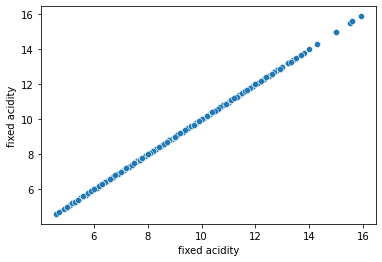

In [27]:
sns.scatterplot(x=df['fixed acidity'],y=df['fixed acidity'])

# volatile acidity

<AxesSubplot:xlabel='volatile acidity', ylabel='volatile acidity'>

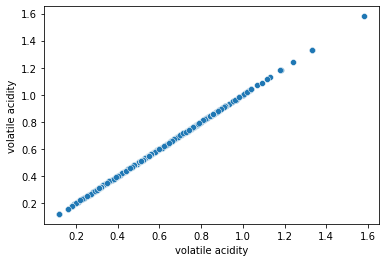

In [28]:
sns.scatterplot(x=df['volatile acidity'],y=df['volatile acidity'])

# hyper Parameter Tuneing

In [109]:
hyp={'n_estimators':np.arange(10,175),
    'criterion':['entropy','gini'],
    'max_depth':np.arange(5,12),
    'min_samples_split':np.arange(2,20),
    'min_samples_leaf':np.arange(1,20)
    }

In [110]:
model_rscv=RandomizedSearchCV(model_rf,hyp,cv=5)
model_rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([ 5,  6,  7,  8,  9, 10, 11]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'n_estimators': array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19...
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,

In [111]:
model_rscv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=7,
                       min_samples_split=5, n_estimators=62)

In [112]:
y_predict_test=model_rscv.predict(x_test)

accuracy_score1=accuracy_score(y_test,y_predict_test)
classification_report1=classification_report(y_test,y_predict_test)

print('Testing Data Evaluation of Random forest')
print(f'accuracy_score1: {accuracy_score1}')
print(classification_report1)

print('x'*60)

y_predict_train=model_rscv.predict(x_train)

accuracy_score2=accuracy_score(y_train,y_predict_train)
classification_report2=classification_report(y_train,y_predict_train)

print('Training Data Evaluation of Random forest')
print(f'accuracy_score: {accuracy_score2}')
print(classification_report2)

print('x'*60)
print(f'Bias={abs(0.85-accuracy_score2)*100}')
print(f'Varience={(accuracy_score2-accuracy_score1)*100}')


Testing Data Evaluation of Random forest
accuracy_score1: 0.6270833333333333
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.71      0.74      0.72       204
           6       0.56      0.72      0.63       192
           7       0.57      0.20      0.30        60
           8       0.00      0.00      0.00         5

    accuracy                           0.63       480
   macro avg       0.31      0.28      0.28       480
weighted avg       0.60      0.63      0.60       480

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Training Data Evaluation of Random forest
accuracy_score: 0.8016085790884718
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        37
           5       0.82      0.91      0.86       477
           6       0.76  